In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler , MinMaxScaler, StandardScaler
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input,Flatten,Conv1D,MaxPooling1D
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras.layers import LSTM
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler


## Random Oversampling with Evaluation


In [62]:
df= pd.read_csv('Heart Disease Data 2015.csv')
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## splite data

In [63]:
df.drop(['Income',"Education",'DiffWalk',"NoDocbcCost","AnyHealthcare",'Veggies',"Fruits","CholCheck"],axis=1,inplace=True)


In [64]:
x = df.drop(["HeartDiseaseorAttack"] , axis = 1).values
y = df["HeartDiseaseorAttack"].values

In [65]:

ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(x, y)
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_ros, y_ros, test_size=0.25, random_state=42)


In [66]:
scaler = MinMaxScaler()
x_train1 = scaler.fit_transform(x_train1)
x_test1 = scaler.transform(x_test1)

## random forest

In [7]:




# Inicjalizacja modelu z domyślnymi parametrami
rf = RandomForestClassifier()

# Określenie siatki parametrów do przetestowania
param_grid = {
    'n_estimators': [100, 200, 300],  # Liczba drzew
    'max_depth': [10, 20, 30],        # Maksymalna głębokość drzewa
    'min_samples_split': [2, 4, 6],   # Minimalna liczba próbek wymagana do podziału węzła
    'min_samples_leaf': [1, 2, 4],    # Minimalna liczba próbek wymagana w liściu
    'max_features': ['auto', 'sqrt']  # Liczba cech do rozważenia przy każdym podziale
}

# Utworzenie obiektu GridSearchCV
cv_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Przeszukiwanie siatki parametrów
cv_rf.fit(x_train1, y_train1)

# Najlepszy zestaw parametrów
print("Najlepsze parametry: ", cv_rf.best_params_)

# Najlepszy estimator
best_rf = cv_rf.best_estimator_

# Predykcje i ocena modelu
ypred_train = best_rf.predict(x_train1)
ypred_test = best_rf.predict(x_test1)

print("Training Results\n")
print(classification_report(y_train1, ypred_train))
print("Test Results\n")
print(classification_report(y_test1, ypred_test))

# Macierz pomyłek
conf_matrix = confusion_matrix(y_test1, ypred_test)
print("Confusion Matrix:\n", conf_matrix)

# Ocena modelu za pomocą walidacji krzyżowej
cross_val_scores = cross_val_score(best_rf, x_train1, y_train1, cv=5)
print("Cross-validation scores:", cross_val_scores)
print("Average cross-validation score:", np.mean(cross_val_scores))

Najlepsze parametry:  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Training Results

              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95    172233
         1.0       0.93      0.97      0.95    172447

    accuracy                           0.95    344680
   macro avg       0.95      0.95      0.95    344680
weighted avg       0.95      0.95      0.95    344680

Test Results

              precision    recall  f1-score   support

         0.0       0.97      0.87      0.92     57554
         1.0       0.88      0.97      0.92     57340

    accuracy                           0.92    114894
   macro avg       0.92      0.92      0.92    114894
weighted avg       0.92      0.92      0.92    114894

Confusion Matrix:
 [[50123  7431]
 [ 1806 55534]]
Cross-validation scores: [0.91306429 0.91113497 0.91210688 0.91265812 0.91277417]
Average cross-validation score: 0.9123476848090982

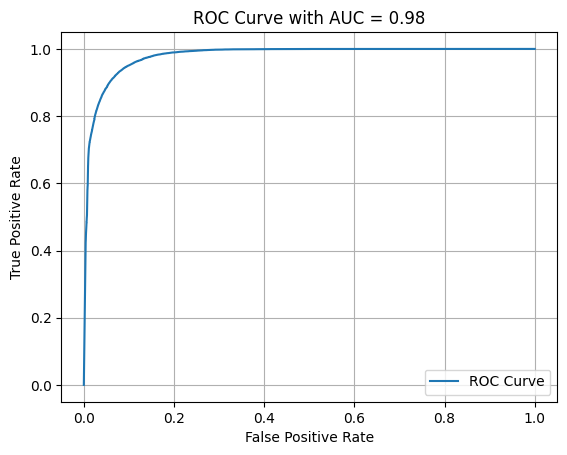

In [8]:

y_proba_test = best_rf.predict_proba(x_test1)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test1, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test1, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## DECISION TREE CLASSIFIER

In [9]:

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

# Utworzenie modelu drzewa decyzyjnego
tree = DecisionTreeClassifier()

# Uruchomienie Grid Search z walidacją krzyżową
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train1, y_train1)

# Wyświetlenie najlepszych parametrów i wyników
print("Najlepsze parametry:", grid_search.best_params_)
print("Najlepsza dokładność:", grid_search.best_score_)

# Utworzenie i ocena modelu z najlepszymi parametrami
best_tree = grid_search.best_estimator_
best_tree.fit(x_train1, y_train1)

ypred_train2 = best_tree.predict(x_train1)
ypred_test2 = best_tree.predict(x_test1)

# Ocena modelu na zbiorze testowym

print("Training Results\n")
print(classification_report(y_train1, ypred_train2))
print('Testing Results\n')
print(classification_report(y_test1, ypred_test2))

# Dodatkowo: Walidacja krzyżowa dla najlepszego modelu na całym zbiorze danych
cross_val_scores = cross_val_score(best_tree, x_train1, y_train1, cv=5)
print("Cross-Validation Scores for the Best Model:", cross_val_scores)
print("Average Cross-Validation Score:", cross_val_scores.mean())

Najlepsze parametry: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Najlepsza dokładność: 0.9043054427294882
Training Results

              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95    172233
         1.0       0.94      0.97      0.95    172447

    accuracy                           0.95    344680
   macro avg       0.95      0.95      0.95    344680
weighted avg       0.95      0.95      0.95    344680

Testing Results

              precision    recall  f1-score   support

         0.0       0.96      0.86      0.91     57554
         1.0       0.87      0.97      0.92     57340

    accuracy                           0.91    114894
   macro avg       0.92      0.91      0.91    114894
weighted avg       0.92      0.91      0.91    114894

Cross-Validation Scores for the Best Model: [0.90476674 0.90357723 0.90409945 0.90460717 0.90486828]
Average Cross-Validation Score: 0.9043837762562376


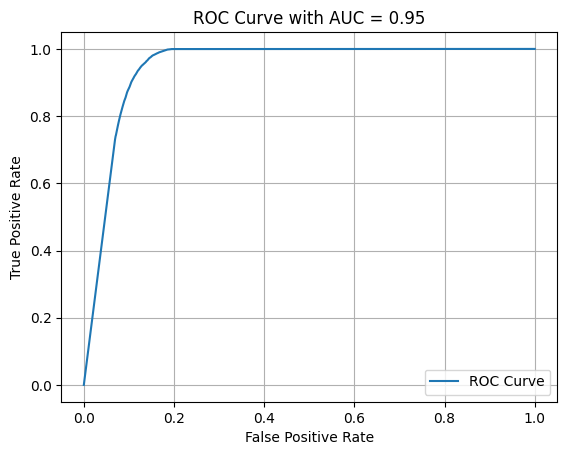

In [10]:

y_proba_test = best_tree.predict_proba(x_test1)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test1, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test1, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Naive Bayes

In [11]:
Gnb = GaussianNB()
Gnb.fit(x_train1, y_train1)
ypred_train3 = Gnb.predict(x_train1)
y_pred_test3 = Gnb.predict(x_test1)

print("Naive Bayes Classifier Accuracy: ",accuracy_score(y_test1, y_pred_test3))

Naive Bayes Classifier Accuracy:  0.724876843003116


In [12]:
print('Testing Results\n')
print(classification_report(y_train1, ypred_train3))

Testing Results

              precision    recall  f1-score   support

         0.0       0.70      0.79      0.74    172233
         1.0       0.76      0.66      0.71    172447

    accuracy                           0.73    344680
   macro avg       0.73      0.73      0.72    344680
weighted avg       0.73      0.73      0.72    344680



In [13]:
print('Testing Results\n')
print(classification_report(y_test1, y_pred_test3))

Testing Results

              precision    recall  f1-score   support

         0.0       0.70      0.79      0.74     57554
         1.0       0.76      0.66      0.70     57340

    accuracy                           0.72    114894
   macro avg       0.73      0.72      0.72    114894
weighted avg       0.73      0.72      0.72    114894



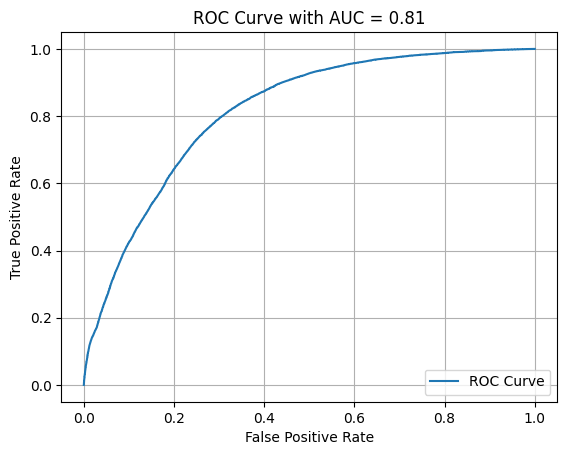

In [14]:

y_proba_test = Gnb.predict_proba(x_test1)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test1, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test1, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## XGBOSST


Najlepsze parametry:  {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.7}
Accuracy on Training set:  0.8149297899500987
Accuracy on Test set:  0.8034013960694205

Training Results

              precision    recall  f1-score   support

         0.0       0.85      0.77      0.81    172233
         1.0       0.79      0.86      0.82    172447

    accuracy                           0.81    344680
   macro avg       0.82      0.81      0.81    344680
weighted avg       0.82      0.81      0.81    344680

Testing Results

              precision    recall  f1-score   support

         0.0       0.84      0.75      0.79     57554
         1.0       0.78      0.85      0.81     57340

    accuracy                           0.80    114894
   macro avg       0.81      0.80      0.80    114894
weighted avg       0.81      0.80      0.80    114894



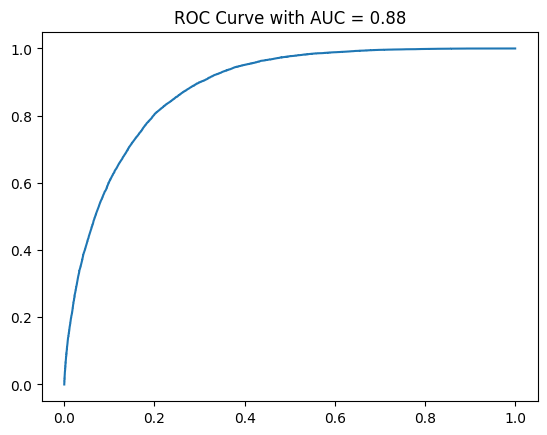

In [15]:




# Inicjalizacja modelu XGBoost
xg = XGBClassifier()

# Definiowanie siatki hiperparametrów do przetestowania
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Utworzenie obiektu GridSearchCV
grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, cv=3, scoring='accuracy')

# Przeszukiwanie siatki parametrów
grid_search.fit(x_train1, y_train1)

# Najlepsze parametry i najlepszy model
print("Najlepsze parametry: ", grid_search.best_params_)
best_xg = grid_search.best_estimator_

# Predykcje na zbiorze treningowym i testowym
ypred_train4 = best_xg.predict(x_train1)
y_pred_test4 = best_xg.predict(x_test1)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train1, ypred_train4))
print("Accuracy on Test set: ", accuracy_score(y_test1, y_pred_test4))
print("\nTraining Results\n")
print(classification_report(y_train1, ypred_train4))
print('Testing Results\n')
print(classification_report(y_test1, y_pred_test4))

# Krzywa ROC
y_proba_test4 = best_xg.predict_proba(x_test1)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test1, y_proba_test4)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test1, y_proba_test4)))
plt.show()

## logistic regression

Najlepsze parametry:  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy on Training set:  0.7686839967506093
Accuracy on Test set:  0.7678468849548279

Training Results

              precision    recall  f1-score   support

         0.0       0.78      0.75      0.76    172233
         1.0       0.76      0.79      0.77    172447

    accuracy                           0.77    344680
   macro avg       0.77      0.77      0.77    344680
weighted avg       0.77      0.77      0.77    344680

Testing Results

              precision    recall  f1-score   support

         0.0       0.78      0.75      0.76     57554
         1.0       0.76      0.79      0.77     57340

    accuracy                           0.77    114894
   macro avg       0.77      0.77      0.77    114894
weighted avg       0.77      0.77      0.77    114894



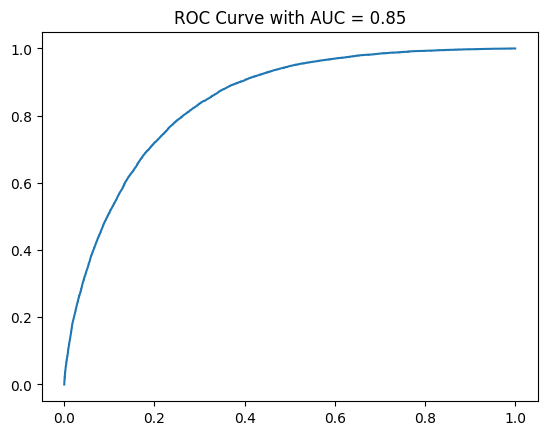

In [16]:


# Inicjalizacja modelu regresji logistycznej
lg = LogisticRegression()

# Definiowanie siatki hiperparametrów do przetestowania
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Parametr regularyzacji
    'penalty': ['l1', 'l2'],       # Typ regularyzacji
    'solver': ['liblinear']        # Algorytm optymalizacji (liblinear jest dobrym wyborem dla małych zbiorów danych)
}

# Utworzenie obiektu GridSearchCV
grid_search = GridSearchCV(estimator=lg, param_grid=param_grid, cv=5, scoring='accuracy')

# Przeszukiwanie siatki parametrów
grid_search.fit(x_train1, y_train1)

# Najlepsze parametry i najlepszy model
print("Najlepsze parametry: ", grid_search.best_params_)
best_lg = grid_search.best_estimator_

# Predykcje na zbiorze treningowym i testowym
ypred_train4 = best_lg.predict(x_train1)
y_pred_test4 = best_lg.predict(x_test1)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train1, ypred_train4))
print("Accuracy on Test set: ", accuracy_score(y_test1, y_pred_test4))
print("\nTraining Results\n")
print(classification_report(y_train1, ypred_train4))
print('Testing Results\n')
print(classification_report(y_test1, y_pred_test4))

# Krzywa ROC
y_proba_test4 = best_lg.predict_proba(x_test1)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test1, y_proba_test4)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test1, y_proba_test4)))
plt.show()

## GradientBoostingClassifier

Najlepsze parametry:  {'learning_rate': 0.2, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy on Training set:  0.8333729836369966
Accuracy on Test set:  0.8175970894911831

Training Results

              precision    recall  f1-score   support

         0.0       0.86      0.79      0.83    172233
         1.0       0.81      0.87      0.84    172447

    accuracy                           0.83    344680
   macro avg       0.84      0.83      0.83    344680
weighted avg       0.84      0.83      0.83    344680

Testing Results

              precision    recall  f1-score   support

         0.0       0.85      0.77      0.81     57554
         1.0       0.79      0.86      0.83     57340

    accuracy                           0.82    114894
   macro avg       0.82      0.82      0.82    114894
weighted avg       0.82      0.82      0.82    114894



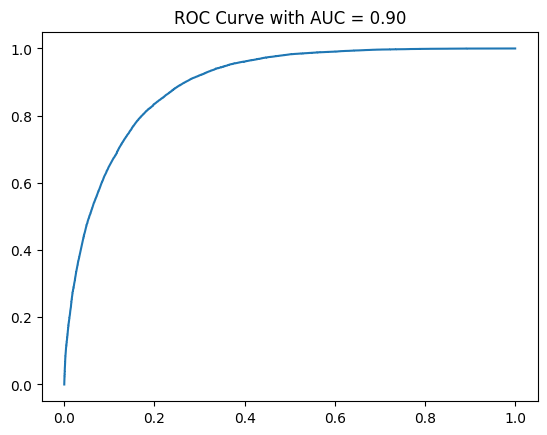

In [ ]:


# Inicjalizacja modelu Gradient Boosting Classifier
gb = GradientBoostingClassifier()

# Definiowanie siatki hiperparametrów do przetestowania
param_grid = {
    'n_estimators': [100, 200, 300],  # Liczba drzew w ensemble
    'learning_rate': [0.01, 0.1, 0.2], # Szybkość uczenia
    'max_depth': [3, 5, 7],            # Maksymalna głębokość drzewa
    'min_samples_split': [2, 4],       # Minimalna liczba próbek wymagana do podziału węzła
    'min_samples_leaf': [1, 2]         # Minimalna liczba próbek w liściu
}

# Utworzenie obiektu GridSearchCV
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy')

# Przeszukiwanie siatki parametrów
grid_search.fit(x_train1, y_train1)

# Najlepsze parametry i najlepszy model
print("Najlepsze parametry: ", grid_search.best_params_)
best_gb = grid_search.best_estimator_

# Predykcje na zbiorze treningowym i testowym
ypred_train6 = best_gb.predict(x_train1)
y_pred_test6 = best_gb.predict(x_test1)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train1, ypred_train6))
print("Accuracy on Test set: ", accuracy_score(y_test1, y_pred_test6))
print("\nTraining Results\n")
print(classification_report(y_train1, ypred_train6))
print('Testing Results\n')
print(classification_report(y_test1, y_pred_test6))

# Krzywa ROC
y_proba_test6 = best_gb.predict_proba(x_test1)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test1, y_proba_test6)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test1, y_proba_test6)))
plt.show()

## KNN

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train1, y_train1)

KNeighborsClassifier()

In [ ]:
grid_cv = GridSearchCV(KNeighborsClassifier(), 
                       param_grid={
                           "n_neighbors": range(1, 50)
                       }, cv=5, scoring="f1", 
                       verbose=1, n_jobs=6)

In [ ]:
grid_cv.fit(x_train1, 
            y_train1)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=6,
             param_grid={'n_neighbors': range(1, 50)}, scoring='f1', verbose=1)

In [ ]:
grid_cv.best_score_

0.8941684870573203

In [ ]:
knn = grid_cv.best_estimator_
knn

KNeighborsClassifier(n_neighbors=1)

In [ ]:
ypred_train8 = grid_cv.predict(x_train1)
y_pred_test8 = grid_cv.predict(x_test1)
print("XGBClassifier Accuracy: ",accuracy_score(y_test1, y_pred_test8))

XGBClassifier Accuracy:  0.8961129388827963


In [ ]:
print("Training Results\n")
print(classification_report(y_train1, ypred_train8))

Training Results

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93    172233
         1.0       0.93      0.94      0.93    172447

    accuracy                           0.93    344680
   macro avg       0.93      0.93      0.93    344680
weighted avg       0.93      0.93      0.93    344680



In [ ]:
print('Testing Results\n')
print(classification_report(y_test1, y_pred_test8))

Testing Results

              precision    recall  f1-score   support

         0.0       0.93      0.86      0.89     57554
         1.0       0.87      0.93      0.90     57340

    accuracy                           0.90    114894
   macro avg       0.90      0.90      0.90    114894
weighted avg       0.90      0.90      0.90    114894



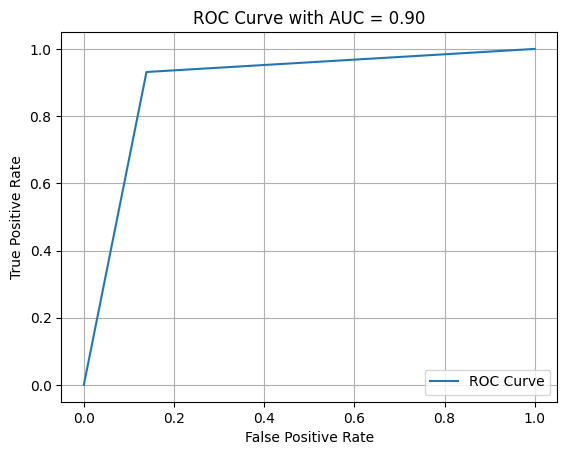

In [ ]:

y_proba_test = grid_cv.predict_proba(x_test1)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test1, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test1, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## SIECI NEURONOWE

## ANN

In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)


In [ ]:
ann.add(tf.keras.layers.Dense(units=14, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
ann.fit(x_train1, y_train1, batch_size = 32, epochs=100,
          validation_data=(x_test1, y_test1), verbose=1,
          callbacks=[early_stop])

Epoch 1/100


10772/10772 [==============================] - 29s 3ms/step - loss: 0.4914 - accuracy: 0.7634 - val_loss: 0.4853 - val_accuracy: 0.7676
Epoch 2/100
10772/10772 [==============================] - 28s 3ms/step - loss: 0.4812 - accuracy: 0.7705 - val_loss: 0.4811 - val_accuracy: 0.7701
Epoch 3/100
10772/10772 [==============================] - 28s 3ms/step - loss: 0.4801 - accuracy: 0.7713 - val_loss: 0.4833 - val_accuracy: 0.7687
Epoch 4/100
10772/10772 [==============================] - 19s 2ms/step - loss: 0.4794 - accuracy: 0.7719 - val_loss: 0.4801 - val_accuracy: 0.7713
Epoch 5/100
10772/10772 [==============================] - 18s 2ms/step - loss: 0.4791 - accuracy: 0.7723 - val_loss: 0.4816 - val_accuracy: 0.7700
Epoch 6/100
10772/10772 [==============================] - 14s 1ms/step - loss: 0.4789 - accuracy: 0.7722 - val_loss: 0.4805 - val_accuracy: 0.7699
Epoch 7/100
10772/10772 [==============================] - 12s 1ms/step - loss: 0.4785 - accuracy: 0.7727 - va

In [ ]:
ypred_train81 = ann.predict(x_train1)
y_pred_test81 = ann.predict(x_test1)

y_pred_test81 = (y_pred_test8 > 0.5)
ypred_train81 = (ypred_train8 > 0.5)
print(np.concatenate((y_pred_test81.reshape(len(y_pred_test81),1), y_test1.reshape(len(y_test1),1)),1))

3591/3591 [==============================] - 3s 713us/step
[[1. 1.]
 [1. 1.]
 [1. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [1. 1.]]


In [ ]:
accuracy_score(y_test1, y_pred_test8)

0.8961129388827963

In [ ]:
print("Training Results\n")
print(classification_report(y_train1, ypred_train81))

Training Results

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93    172233
         1.0       0.93      0.94      0.93    172447

    accuracy                           0.93    344680
   macro avg       0.93      0.93      0.93    344680
weighted avg       0.93      0.93      0.93    344680



In [ ]:
print('Testing Results\n')
print(classification_report(y_test1, y_pred_test81))

Testing Results

              precision    recall  f1-score   support

         0.0       0.93      0.86      0.89     57554
         1.0       0.87      0.93      0.90     57340

    accuracy                           0.90    114894
   macro avg       0.90      0.90      0.90    114894
weighted avg       0.90      0.90      0.90    114894



3591/3591 [==============================] - 3s 763us/step


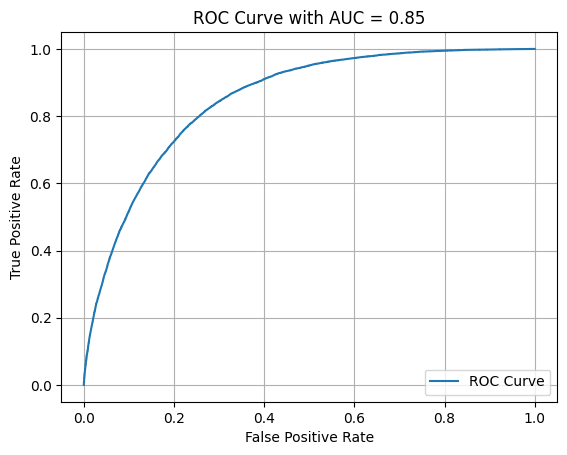

In [ ]:

y_proba_test = ann.predict(x_test1).flatten()

fpr, tpr, thresholds = roc_curve(y_test1, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test1, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inna proba 

In [ ]:

tf.random.set_seed(42)



model_22 = tf.keras.Sequential([
  tf.keras.layers.Dense(18,activation = 'relu'),
  tf.keras.layers.Dense(36,activation = 'relu'),
  tf.keras.layers.Dense(18,activation = 'relu'),
  tf.keras.layers.Dense(9,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')                            
])


model_22.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])


history_2 = model_22.fit(x_train1,y_train1,epochs = 100)

Epoch 1/100
10772/10772 [==============================] - 11s 974us/step - loss: 0.4871 - accuracy: 0.7666
Epoch 2/100
10772/10772 [==============================] - 10s 942us/step - loss: 0.4804 - accuracy: 0.7706
Epoch 3/100
10772/10772 [==============================] - 10s 936us/step - loss: 0.4792 - accuracy: 0.7715
Epoch 4/100
10772/10772 [==============================] - 10s 917us/step - loss: 0.4782 - accuracy: 0.7724
Epoch 5/100
10772/10772 [==============================] - 10s 942us/step - loss: 0.4775 - accuracy: 0.7724
Epoch 6/100
10772/10772 [==============================] - 10s 961us/step - loss: 0.4769 - accuracy: 0.7727
Epoch 7/100
10772/10772 [==============================] - 10s 946us/step - loss: 0.4764 - accuracy: 0.7733
Epoch 8/100
10772/10772 [==============================] - 10s 940us/step - loss: 0.4758 - accuracy: 0.7732
Epoch 9/100
10772/10772 [==============================] - 10s 921us/step - loss: 0.4753 - accuracy: 0.7730
Epoch 10/100
10772/10772 [==

In [ ]:
model_22.evaluate(x_test1,y_test1)

3591/3591 [==============================] - 3s 798us/step - loss: 0.4620 - accuracy: 0.7770


[0.4620100259780884, 0.7770205736160278]

In [ ]:
ypred_train221 = model_22.predict(x_train1)
y_pred_test221 = model_22.predict(x_test1)

y_pred_test221 = (y_pred_test221 > 0.5)
ypred_train221 = (ypred_train221 > 0.5)

print(classification_report(y_train1,ypred_train221))
print(classification_report(y_test1,y_pred_test221))

3591/3591 [==============================] - 3s 729us/step
              precision    recall  f1-score   support

         0.0       0.81      0.74      0.77    172233
         1.0       0.76      0.83      0.79    172447

    accuracy                           0.78    344680
   macro avg       0.79      0.78      0.78    344680
weighted avg       0.79      0.78      0.78    344680

              precision    recall  f1-score   support

         0.0       0.80      0.73      0.77     57554
         1.0       0.75      0.82      0.79     57340

    accuracy                           0.78    114894
   macro avg       0.78      0.78      0.78    114894
weighted avg       0.78      0.78      0.78    114894



3591/3591 [==============================] - 3s 741us/step


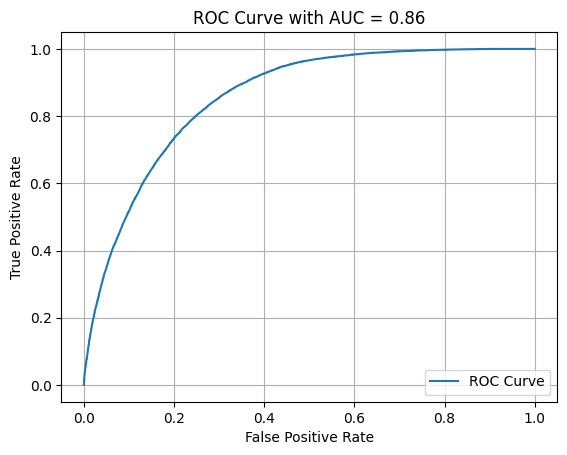

In [ ]:

y_proba_test = model_22.predict(x_test1).flatten()

fpr, tpr, thresholds = roc_curve(y_test1, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test1, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inne próby sieci neuronowych 

In [ ]:

tf.random.set_seed(42)



model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(14,activation = 'relu'),
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')                            
])


model_2.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])


history_2 = model_2.fit(x_train1,y_train1,epochs = 100)

Epoch 1/100
10772/10772 [==============================] - 10s 929us/step - loss: 0.4908 - accuracy: 0.7635
Epoch 2/100
10772/10772 [==============================] - 10s 889us/step - loss: 0.4820 - accuracy: 0.7692
Epoch 3/100
10772/10772 [==============================] - 10s 891us/step - loss: 0.4811 - accuracy: 0.7700
Epoch 4/100
10772/10772 [==============================] - 10s 896us/step - loss: 0.4803 - accuracy: 0.7704
Epoch 5/100
10772/10772 [==============================] - 10s 939us/step - loss: 0.4797 - accuracy: 0.7713
Epoch 6/100
10772/10772 [==============================] - 11s 1ms/step - loss: 0.4794 - accuracy: 0.7716
Epoch 7/100
10772/10772 [==============================] - 10s 939us/step - loss: 0.4791 - accuracy: 0.7720
Epoch 8/100
10772/10772 [==============================] - 10s 937us/step - loss: 0.4788 - accuracy: 0.7717
Epoch 9/100
10772/10772 [==============================] - 10s 947us/step - loss: 0.4786 - accuracy: 0.7723
Epoch 10/100
10772/10772 [====

In [ ]:
model_2.evaluate(x_test1,y_test1)

3591/3591 [==============================] - 3s 855us/step - loss: 0.4769 - accuracy: 0.7707


[0.4768812656402588, 0.7706755995750427]

In [ ]:
ypred_train111 = model_2.predict(x_train1)
y_pred_test111 = model_2.predict(x_test1)

y_pred_test111 = (y_pred_test111 > 0.5)
ypred_train111 = (ypred_train111 > 0.5)

print(classification_report(y_train1,ypred_train111))
print(classification_report(y_test1,y_pred_test111))

3591/3591 [==============================] - 3s 789us/step
              precision    recall  f1-score   support

         0.0       0.79      0.74      0.76    172233
         1.0       0.75      0.81      0.78    172447

    accuracy                           0.77    344680
   macro avg       0.77      0.77      0.77    344680
weighted avg       0.77      0.77      0.77    344680

              precision    recall  f1-score   support

         0.0       0.79      0.73      0.76     57554
         1.0       0.75      0.81      0.78     57340

    accuracy                           0.77    114894
   macro avg       0.77      0.77      0.77    114894
weighted avg       0.77      0.77      0.77    114894



3591/3591 [==============================] - 3s 842us/step


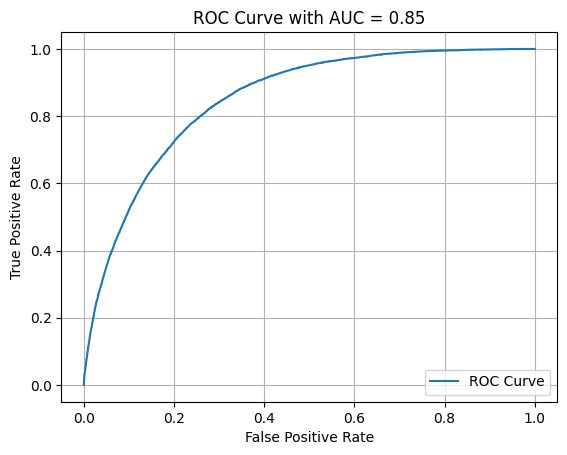

In [ ]:

y_proba_test = model_2.predict(x_test1).flatten()

fpr, tpr, thresholds = roc_curve(y_test1, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test1, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inne próby sieci neuronowych 

In [ ]:
model1 = Sequential()
model1.add(Dense(units=30,activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(units=15,activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(units=1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model1.fit(x=x_train1, 
          y=y_train1, 
          epochs=100,
          validation_data=(x_test1, y_test1), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
10772/10772 [==============================] - 16s 1ms/step - loss: 0.5333 - val_loss: 0.4847
Epoch 2/100
10772/10772 [==============================] - 15s 1ms/step - loss: 0.5120 - val_loss: 0.4835
Epoch 3/100
10772/10772 [==============================] - 15s 1ms/step - loss: 0.5109 - val_loss: 0.4825
Epoch 4/100
10772/10772 [==============================] - 15s 1ms/step - loss: 0.5099 - val_loss: 0.4814
Epoch 5/100
10772/10772 [==============================] - 15s 1ms/step - loss: 0.5088 - val_loss: 0.4811
Epoch 6/100
10772/10772 [==============================] - 15s 1ms/step - loss: 0.5080 - val_loss: 0.4820
Epoch 7/100
10772/10772 [==============================] - 15s 1ms/step - loss: 0.5086 - val_loss: 0.4827
Epoch 8/100
10772/10772 [==============================] - 15s 1ms/step - loss: 0.5079 - val_loss: 0.4817
Epoch 9/100
10772/10772 [==============================] - 15s 1ms/step - loss: 0.5077 - val_loss: 0.4833
Epoch 10/100
10772/10772 [====================

In [ ]:
ypred_train121 = model1.predict(x_train1)
y_pred_test121 = model1.predict(x_test1)

y_pred_test121 = (y_pred_test121 > 0.5)
ypred_train121 = (ypred_train121 > 0.5)

print(classification_report(y_train1,ypred_train121))
print(classification_report(y_test1,y_pred_test121))

3591/3591 [==============================] - 3s 955us/step
              precision    recall  f1-score   support

         0.0       0.81      0.71      0.76    172233
         1.0       0.74      0.83      0.78    172447

    accuracy                           0.77    344680
   macro avg       0.78      0.77      0.77    344680
weighted avg       0.78      0.77      0.77    344680

              precision    recall  f1-score   support

         0.0       0.81      0.71      0.76     57554
         1.0       0.74      0.83      0.78     57340

    accuracy                           0.77    114894
   macro avg       0.77      0.77      0.77    114894
weighted avg       0.77      0.77      0.77    114894



3591/3591 [==============================] - 4s 1ms/step


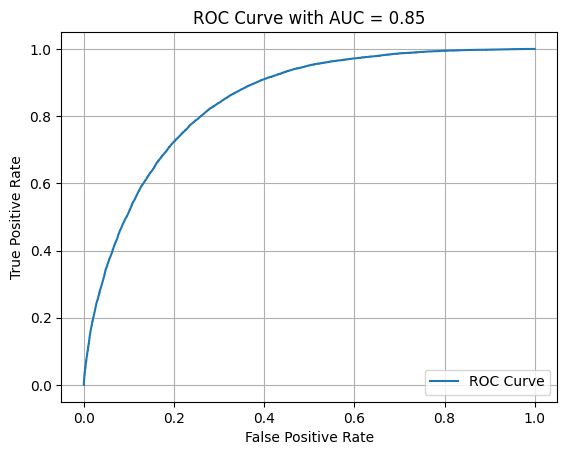

In [ ]:

y_proba_test = model1.predict(x_test1).flatten()

fpr, tpr, thresholds = roc_curve(y_test1, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test1, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inny model

In [ ]:
model2 = Sequential()

model2.add(Dense(14,  activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(10, activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(units=1,activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model2.fit(x=x_train1, 
          y=y_train1, 
          epochs=100,
          validation_data=(x_test1, y_test1), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
10772/10772 [==============================] - 17s 2ms/step - loss: 0.5134 - val_loss: 0.4848
Epoch 2/100
10772/10772 [==============================] - 16s 2ms/step - loss: 0.4944 - val_loss: 0.4845
Epoch 3/100
10772/10772 [==============================] - 16s 1ms/step - loss: 0.4931 - val_loss: 0.4841
Epoch 4/100
10772/10772 [==============================] - 16s 1ms/step - loss: 0.4919 - val_loss: 0.4859
Epoch 5/100
10772/10772 [==============================] - 16s 1ms/step - loss: 0.4912 - val_loss: 0.4817
Epoch 6/100
10772/10772 [==============================] - 15s 1ms/step - loss: 0.4912 - val_loss: 0.4828
Epoch 7/100
10772/10772 [==============================] - 15s 1ms/step - loss: 0.4907 - val_loss: 0.4833
Epoch 8/100
10772/10772 [==============================] - 15s 1ms/step - loss: 0.4909 - val_loss: 0.4845
Epoch 9/100
10772/10772 [==============================] - 16s 2ms/step - loss: 0.4910 - val_loss: 0.4860
Epoch 10/100
10772/10772 [====================

In [ ]:
ypred_train131 = model2.predict(x_train1)
y_pred_test131 = model2.predict(x_test1)

y_pred_test131 = (y_pred_test131 > 0.5)
ypred_train131 = (ypred_train131 > 0.5)

print("Training Results\n")
print(classification_report(y_train1,ypred_train131))
print("Testing Results\n")
print(classification_report(y_test1,y_pred_test131))

3591/3591 [==============================] - 4s 1ms/step
Training Results

              precision    recall  f1-score   support

         0.0       0.79      0.74      0.77    172233
         1.0       0.76      0.81      0.78    172447

    accuracy                           0.77    344680
   macro avg       0.77      0.77      0.77    344680
weighted avg       0.77      0.77      0.77    344680

Testing Results

              precision    recall  f1-score   support

         0.0       0.79      0.74      0.76     57554
         1.0       0.75      0.80      0.78     57340

    accuracy                           0.77    114894
   macro avg       0.77      0.77      0.77    114894
weighted avg       0.77      0.77      0.77    114894



3591/3591 [==============================] - 4s 1ms/step


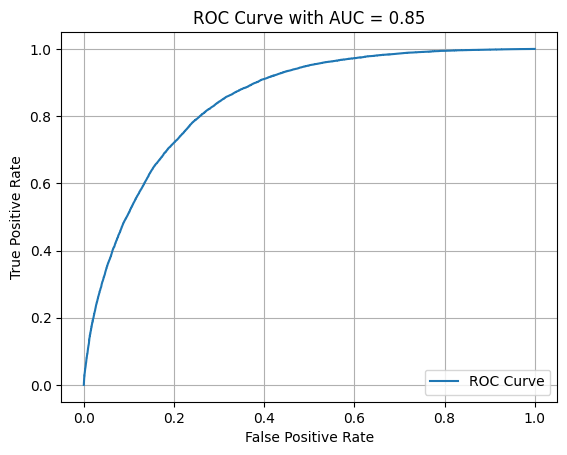

In [ ]:

y_proba_test = model2.predict(x_test1).flatten()

fpr, tpr, thresholds = roc_curve(y_test1, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test1, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## SVC

In [ ]:
model3 = SVC(probability=True)

In [ ]:
model3.fit(x_train1,y_train1)

SVC(probability=True)

In [ ]:
ypred_train141 = model3.predict(x_train1)
y_pred_test141 = model3.predict(x_test1)


print(classification_report(y_train1,ypred_train141))
print(classification_report(y_test1,y_pred_test141))

              precision    recall  f1-score   support

         0.0       0.80      0.72      0.76    172233
         1.0       0.75      0.82      0.78    172447

    accuracy                           0.77    344680
   macro avg       0.77      0.77      0.77    344680
weighted avg       0.77      0.77      0.77    344680

              precision    recall  f1-score   support

         0.0       0.80      0.72      0.76     57554
         1.0       0.74      0.82      0.78     57340

    accuracy                           0.77    114894
   macro avg       0.77      0.77      0.77    114894
weighted avg       0.77      0.77      0.77    114894



In [ ]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [60]:
grid.fit(x_train1,y_train1)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.772 total time=41.6min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.770 total time=34.2min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.770 total time=36.2min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.771 total time=36.4min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.770 total time=36.3min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.771 total time=29.7min


KeyboardInterrupt: 

In [ ]:
grid.best_params_

In [ ]:
grid.best_estimator_

In [ ]:
ypred_train = grid.predict(x_train1)
y_pred_test = grid.predict(x_test1)


print(classification_report(y_train1,ypred_train))
print(classification_report(y_test1,y_pred_test))

In [ ]:

y_proba_test = grid.predict_proba(x_test1)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test1, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test1, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Training Results

              precision    recall  f1-score   support

         0.0       0.80      0.72      0.76    172233
         1.0       0.75      0.82      0.78    172447

    accuracy                           0.77    344680
   macro avg       0.78      0.77      0.77    344680
weighted avg       0.78      0.77      0.77    344680

Testing Results

              precision    recall  f1-score   support

         0.0       0.80      0.72      0.76     57554
         1.0       0.74      0.82      0.78     57340

    accuracy                           0.77    114894
   macro avg       0.77      0.77      0.77    114894
weighted avg       0.77      0.77      0.77    114894



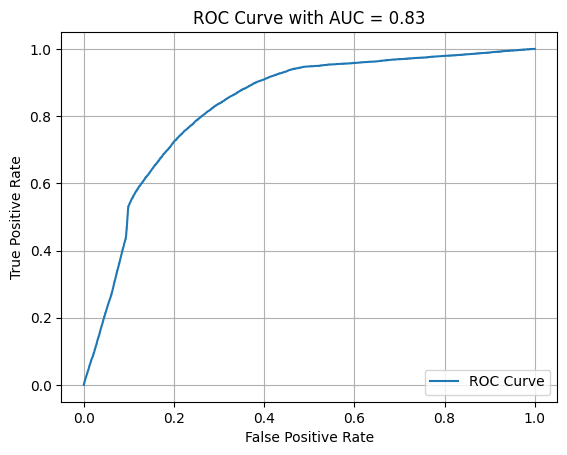

In [67]:
model3 = SVC(C=0.1, gamma=1, kernel='rbf', probability=True)
model3.fit(x_train1, y_train1)

ypred_train14 = model3.predict(x_train1)
y_pred_test14 = model3.predict(x_test1)

print("Training Results\n")
print(classification_report(y_train1, ypred_train14))
print("Testing Results\n")
print(classification_report(y_test1, y_pred_test14))

y_proba_test = model3.predict_proba(x_test1)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test1, y_proba_test)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test1, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()